In [178]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import laplace
from skimage import exposure
from skimage.filters import gaussian
from skimage.filters import sobel_h, sobel_v, sobel

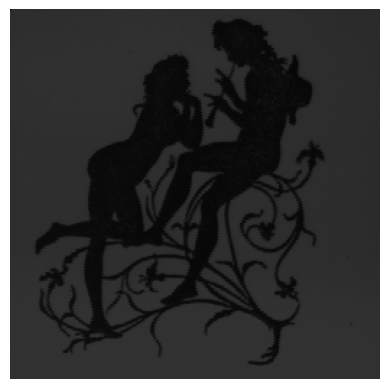

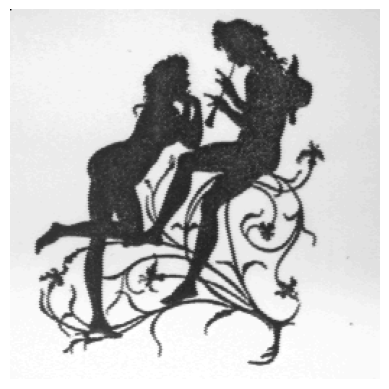

In [240]:
amour = cv2.imread('images\AMOUR.png')
amour_og = amour.astype(np.uint16)
plt.imshow(amour, cmap='gray')
plt.axis('off')
plt.show()
amour= cv2.imread('images\AMOUR.png', cv2.IMREAD_GRAYSCALE).astype(np.int16)
plt.imshow(amour, cmap='gray')
plt.axis('off')
plt.show()

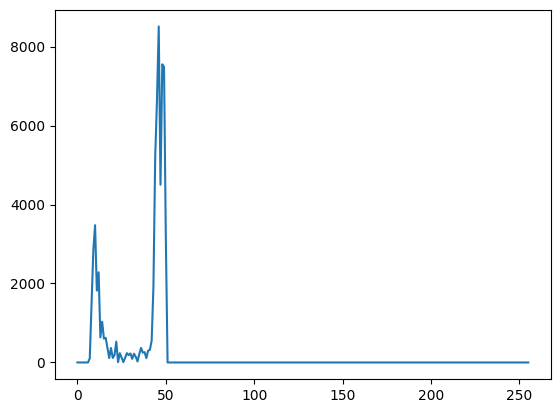

In [190]:
hist=cv2.calcHist([amour.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

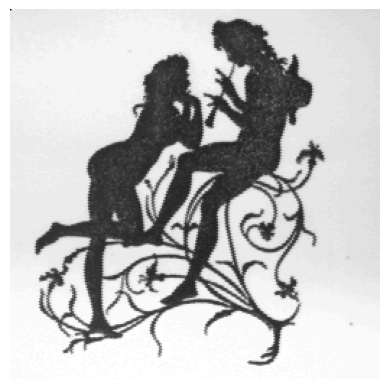

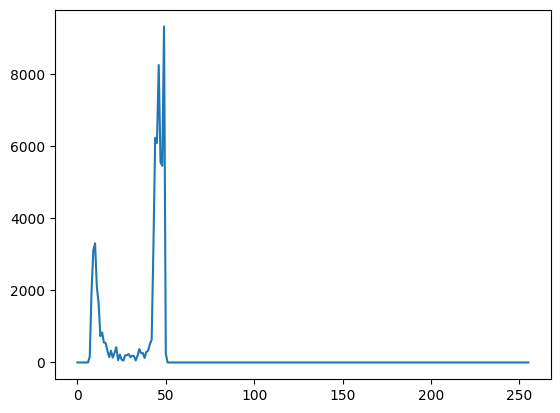

In [218]:
img_s = gaussian(amour.astype(np.uint8), sigma=0.2, preserve_range=True)
plt.imshow(img_s,cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([img_s.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

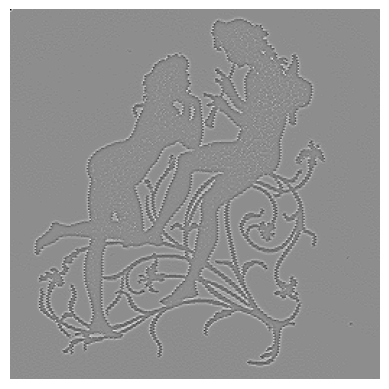

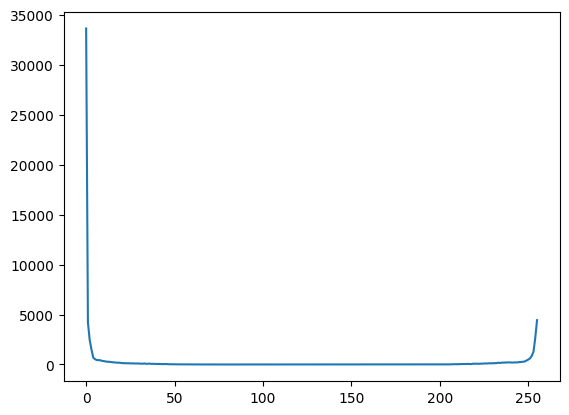

In [219]:
img_l = laplace(img_s, ksize=3)
plt.imshow(img_l,cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([img_l.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

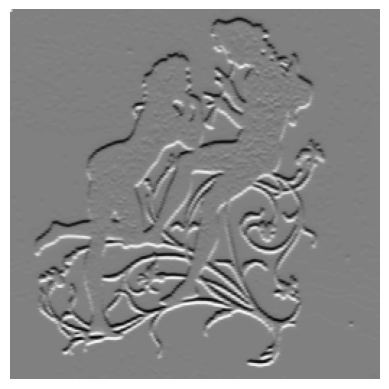

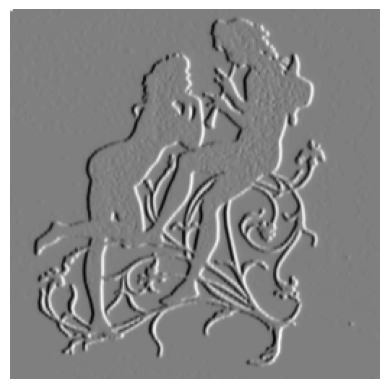

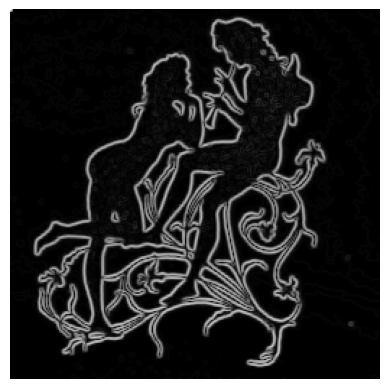

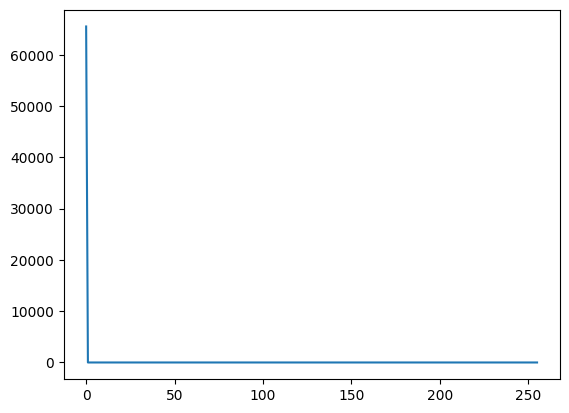

In [222]:
converted = img_s.astype(np.int32)
converted.dtype
img_sh = sobel_h(converted)
plt.imshow(img_sh, cmap='gray')
plt.axis('off')
plt.show()
img_sv = sobel_v(converted)
plt.imshow(img_sv, cmap='gray')
plt.axis('off')
plt.show()
sobel_img = sobel(converted)
plt.imshow(sobel_img, cmap='gray')
plt.axis('off')
plt.show()
hist=cv2.calcHist([sobel_img.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()


(-0.5, 255.5, 255.5, -0.5)

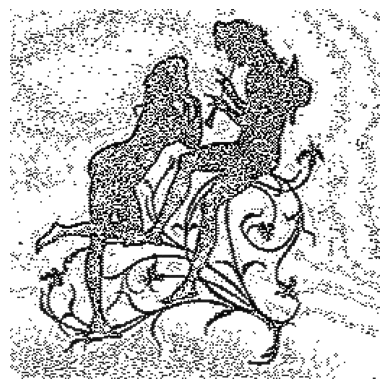

In [242]:
partial_img= amour*0.9
inverted_img = 255- img_l
result= cv2.add(partial_img.astype(np.uint8), inverted_img.astype(np.uint8))
plt.imshow(result, cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

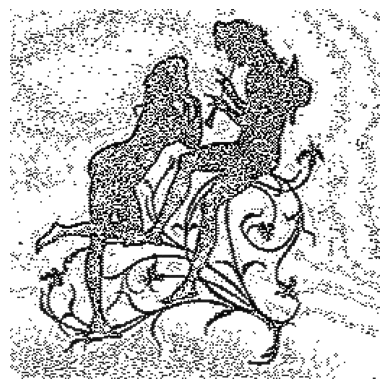

In [244]:
negative= cv2.bitwise_not(result)
plt.imshow(result, cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

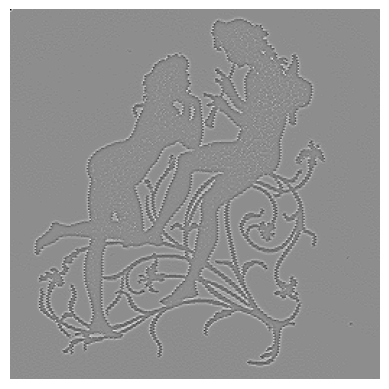

In [239]:
fix= np.where(sobel_img>1, 0, img_l)
plt.imshow(fix,cmap='gray')
plt.axis('off')


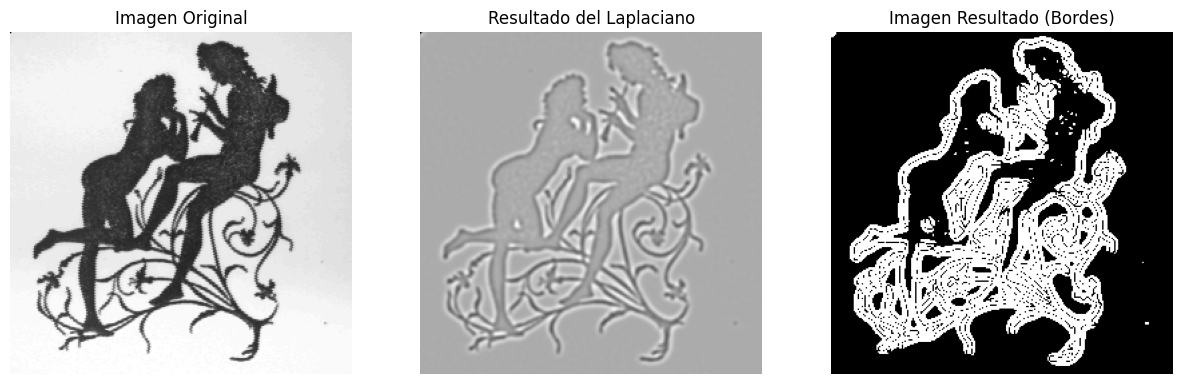

In [185]:
# --- Pipeline completo para detección de bordes LoG ---

# 1. Leer la imagen en escala de grises y convertir a float32
original_image = cv2.imread('images/AMOUR.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)

# 2. Aplicar filtro Gaussiano para suavizar (LoG parte 1)
# El valor de sigma controla el nivel de suavizado. Un valor entre 1 y 2 suele funcionar bien.
smoothed_image = gaussian(original_image, sigma=1.5, preserve_range=True)

# 3. Aplicar filtro Laplaciano (LoG parte 2)
laplacian_image = laplace(smoothed_image, ksize=3)

# 4. Umbralizar para detectar los bordes (aproximación a zero-crossing)
# Se crea una imagen binaria donde los píxeles del borde son blancos (255) y el resto negros (0).
# El umbral (threshold) es sensible; un valor pequeño como 0.75 o 1 es un buen punto de partida.
threshold = 0.8
edge_image = np.zeros_like(laplacian_image)
edge_image[np.abs(laplacian_image) > threshold] = 255

# 5. Mostrar las imágenes del proceso
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image.astype(np.uint8), cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Resultado del Laplaciano')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edge_image, cmap='gray')
plt.title('Imagen Resultado (Bordes)')
plt.axis('off')

plt.show()
